In [369]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

customers_table= pd.read_csv('AdvWorksCusts.csv')
first_row_of_app_data, number_columns =customers_table.shape

buyers_table=  pd.read_csv('AW_BikeBuyer.csv')

aw_test = pd.read_csv('AW_test.csv')

big_table= pd.concat([customers_table, aw_test])
big_table = pd.merge(big_table, buyers_table, on = 'CustomerID')



In [370]:
labels = np.array(big_table['BikeBuyer'])

In [371]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Gender','MaritalStatus', 'Education', 'Occupation']

Features = encode_string(big_table['PostalCode'])
for col in categorical_columns:
    temp = encode_string(big_table[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])  

(16753, 338)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.

In [372]:
Features = np.concatenate([Features, np.array(big_table[['YearlyIncome', 
                            'NumberChildrenAtHome', 'TotalChildren', 'NumberCarsOwned']])], axis = 1)
print(Features.shape)
print(Features[:2, :])

(16753, 342)
[[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00

In [373]:
app_data= Features[first_row_of_app_data:,:]
Features= Features[:first_row_of_app_data,:]
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [374]:
scaler = preprocessing.StandardScaler().fit(X_train[:,338:])
X_train[:,338:] = scaler.transform(X_train[:,338:])
X_test[:,338:] = scaler.transform(X_test[:,338:])
X_train[:2,]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [375]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [376]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.40599652]
[[ 4.05560811e-01 -4.27226329e-01  6.18933856e-02 -1.91995583e-01
   2.92244709e-01 -6.04349501e-02 -3.21004491e-01 -1.95329049e-01
   5.25165983e-01  3.24035010e-01 -5.61503658e-02  2.41637653e-01
  -3.61455690e-01  6.92620607e-01  4.20008589e-01  2.01922697e-01
   4.00416562e-01  1.92722102e-01 -3.57323250e-01 -4.88249135e-01
   6.53782285e-02 -4.76248283e-01  1.11566510e-01 -1.33291920e-01
  -1.43105426e-01  7.15770984e-01  3.02453278e-01 -2.88679881e-01
  -1.31014880e-01 -3.74789206e-01 -5.70276240e-01  2.04613501e-01
   9.42167958e-02 -4.80220426e-01  5.31315145e-02  3.43383210e-01
  -3.65965721e-01  5.79411655e-01 -3.43883257e-01 -2.43210448e-01
  -9.05119455e-02  3.83545752e-01  4.38878194e-01  1.99352246e-01
  -3.17342995e-02  2.26537387e-01  3.88587728e-02  9.44128153e-02
   2.24985931e-01  6.48868737e-01 -1.61221538e-01 -4.39402562e-01
  -6.40132395e-01 -2.60027432e-01 -1.77395579e-01 -1.80546221e-02
  -3.71641797e-02 -3.07895297e-02 -1.80133761e-01  1.04077669e

In [377]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.79039888 0.20960112]
 [0.30144734 0.69855266]
 [0.5498232  0.4501768 ]
 [0.10024643 0.89975357]
 [0.98342168 0.01657832]
 [0.84560952 0.15439048]
 [0.81560449 0.18439551]
 [0.91404524 0.08595476]
 [0.94811885 0.05188115]
 [0.17451236 0.82548764]
 [0.47897054 0.52102946]
 [0.08734046 0.91265954]
 [0.91597423 0.08402577]
 [0.17462023 0.82537977]
 [0.9697115  0.0302885 ]]


In [378]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 1 0 1 0 0 0 0 0 1 1 1 0 1 0]
[0 1 0 1 0 0 0 0 0 0 1 1 0 1 0]


In [379]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive       180                24
Actual negative        34                62

Accuracy  0.81
 
           Positive      Negative
Num case      204            96
Precision    0.84          0.72
Recall       0.88          0.65
F1           0.86          0.68


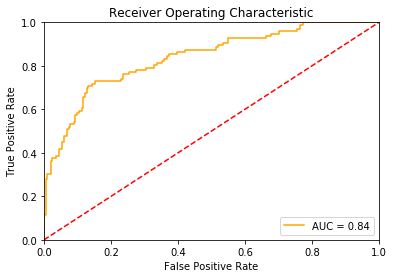

In [380]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities) 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 Confusion matrix
                 Score positive    Score negative
Actual positive       204                 0
Actual negative        96                 0

Accuracy  0.68
 
           Positive      Negative
Num case      204            96
Precision    0.68          0.00
Recall       1.00          0.00
F1           0.81          0.00


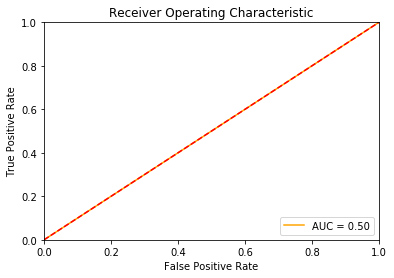

In [381]:
probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive) 

In [382]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [383]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.75457685 0.24542315]
 [0.25755936 0.74244064]
 [0.4813636  0.5186364 ]
 [0.08641081 0.91358919]
 [0.97956227 0.02043773]
 [0.81058096 0.18941904]
 [0.77753293 0.22246707]
 [0.89796981 0.10203019]
 [0.93869275 0.06130725]
 [0.14802488 0.85197512]
 [0.43538551 0.56461449]
 [0.07228575 0.92771425]
 [0.90112603 0.09887397]
 [0.14987899 0.85012101]
 [0.96319007 0.03680993]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive       176                28
Actual negative        28                68

Accuracy  0.81
 
           Positive      Negative
Num case      204            96
Precision    0.86          0.71
Recall       0.86          0.71
F1           0.86          0.71


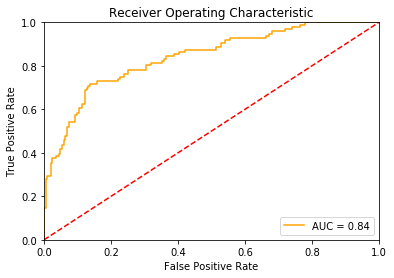

In [384]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  

In [385]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive       172                32
Actual negative        27                69

Accuracy  0.80
 
           Positive      Negative
Num case      204            96
Precision    0.86          0.68
Recall       0.84          0.72
F1           0.85          0.70

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive       160                44
Actual negative        26                70

Accuracy  0.77
 
           Positive      Negative
Num case      204            96
Precision    0.86          0.61
Recall       0.78          0.73
F1           0.82          0.67

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive       143                61
Actual negative        21                75

Accuracy  0.73
 
           Positive      Negative
Num cas

In [386]:
app_data[:,338:] = scaler.transform(app_data[:,338:])

In [387]:
probabilities = logistic_mod.predict_proba(app_data)
probabilities[:15]

array([[0.06531017, 0.93468983],
       [0.04154093, 0.95845907],
       [0.01603686, 0.98396314],
       [0.21554363, 0.78445637],
       [0.10856405, 0.89143595],
       [0.22618355, 0.77381645],
       [0.71781403, 0.28218597],
       [0.54826307, 0.45173693],
       [0.42028695, 0.57971305],
       [0.85120523, 0.14879477],
       [0.71797557, 0.28202443],
       [0.31591652, 0.68408348],
       [0.0495633 , 0.9504367 ],
       [0.14377491, 0.85622509],
       [0.11620465, 0.88379535]])

In [391]:
scores = score_model(probabilities, 0.45)
print('\n'.join(map(str,scores)))

1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
0
1
1
0
1
1
0
0
0
1
1
1
0
1
1
1
1
0
1
0
0
0
1
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
0
0
1
0
0
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
